In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import ToTensor

In [2]:
#Derived from https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

class ExampleCNN(nn.Module):
    def __init__(self):
        super(ExampleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.activation = nn.ReLU()
        self.pool2d = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.fcn = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        x = self.pool2d(self.activation(self.conv1(x)))
        x = self.pool2d(self.activation(self.conv2(x)))
        
        x = x.view(x.size(0), -1)
        
        out = self.fcn(x)
        return out

In [3]:
train_data = torchvision.datasets.MNIST('../data', train=True, transform=ToTensor(), download=True)
test_data = torchvision.datasets.MNIST('../data', train=False, transform=ToTensor(), download=True)
batch_size = 124
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
loaders = {'train' : train_loader, 'test' : test_loader}

In [4]:
from torch.autograd import Variable
from torch import optim

cnn = ExampleCNN()


num_epochs = 10

loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()                # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))               
                pass
        pass
    pass

train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/484], Loss: 0.1198
Epoch [1/10], Step [200/484], Loss: 0.1468
Epoch [1/10], Step [300/484], Loss: 0.1068
Epoch [1/10], Step [400/484], Loss: 0.0906
Epoch [2/10], Step [100/484], Loss: 0.0066
Epoch [2/10], Step [200/484], Loss: 0.0470
Epoch [2/10], Step [300/484], Loss: 0.0223
Epoch [2/10], Step [400/484], Loss: 0.0643
Epoch [3/10], Step [100/484], Loss: 0.0111
Epoch [3/10], Step [200/484], Loss: 0.0977
Epoch [3/10], Step [300/484], Loss: 0.0192
Epoch [3/10], Step [400/484], Loss: 0.0097
Epoch [4/10], Step [100/484], Loss: 0.0636
Epoch [4/10], Step [200/484], Loss: 0.0257
Epoch [4/10], Step [300/484], Loss: 0.0222
Epoch [4/10], Step [400/484], Loss: 0.0497
Epoch [5/10], Step [100/484], Loss: 0.0272
Epoch [5/10], Step [200/484], Loss: 0.0435
Epoch [5/10], Step [300/484], Loss: 0.0018
Epoch [5/10], Step [400/484], Loss: 0.1322
Epoch [6/10], Step [100/484], Loss: 0.1210
Epoch [6/10], Step [200/484], Loss: 0.0834
Epoch [6/10], Step [300/484], Loss: 0.0135
Epoch [6/10

In [8]:
def test():
    # Test the model
    cnn.eval()    
    
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
    pass
test()

Test Accuracy of the model on the 10000 test images: 0.99


In [9]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:10].numpy()
test_output = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [7 2 1 0 4 1 4 9 5 9]
Actual number: [7 2 1 0 4 1 4 9 5 9]


In [10]:
print(cnn.conv1.weight)

Parameter containing:
tensor([[[[ 0.2206,  0.0396, -0.2983, -0.9940,  0.6291],
          [ 0.1813,  0.3511, -0.1126, -0.7033, -0.3305],
          [ 0.0420,  0.6686,  0.5721,  0.2731, -0.0810],
          [-0.1553, -0.0867,  0.1919, -0.0474,  0.1190],
          [-0.3456, -0.3850, -0.1781,  0.3359,  0.2229]]],


        [[[ 0.1366, -0.0457,  0.2032,  0.0245,  0.3715],
          [ 0.1304, -0.0136, -0.3135, -0.1376,  0.4895],
          [ 0.4615,  0.2248, -1.0106, -0.5781, -0.2142],
          [ 0.4486, -1.7338, -0.5122,  0.1766,  0.6348],
          [-1.0547,  0.3682,  0.4127,  0.1762,  0.2583]]],


        [[[-1.1100, -0.3975,  0.3374,  0.2614, -0.7310],
          [-0.4687, -0.2028,  0.2658,  0.4972, -0.3421],
          [-0.0878, -0.2470,  0.2499,  0.0786,  0.1707],
          [-0.8226, -0.4818, -0.2887,  0.3996, -0.0042],
          [-0.1535, -0.2939, -0.0410,  0.2743,  0.3219]]],


        [[[ 0.1032, -0.0963, -0.6364, -0.6036, -0.2142],
          [-0.2413, -0.7968, -0.9535, -0.2650,  0.0373

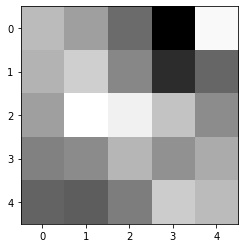

In [21]:
import matplotlib.pyplot as plt
import numpy as np

layer1_filter = 0

plt.imshow(np.squeeze(cnn.conv1.weight.detach().numpy()[layer1_filter,:,:,:]), cmap='gray')
plt.show()

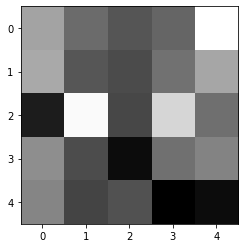

In [24]:
layer2_filter = 0

plt.imshow(cnn.conv2.weight.detach().numpy()[layer2_filter, layer1_filter, :, :], cmap='gray')
plt.show()